<a href="https://colab.research.google.com/github/mchogan/train-donkey-car-model-in-google-colab/blob/main/Training_Donkey_Sim_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Donkey Sim Training using Google Colab

Train your donkey car model using accelerated GPU for FREE on Google Colab

[Training Donkey Car on Google Colab](https://medium.com/@jonathantse/training-donkey-car-on-google-colab-db874ad972f3) explains the concepts demonstrated in this workbook.

## Setup Tensorflow

Use the same Tensorflow version as on the host computer.

In [16]:
!pip install -q -q -q tensorflow-gpu==1.13.1

import tensorflow
print('Using Tensorflow version {}'.format(tensorflow.__version__))

Using Tensorflow version 1.13.1


## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [19]:
import tensorflow
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0' :
  print('GPU device not found. Enable GPU in Edit > Notebook settings.')
else :
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Git Clone the donkey repository

In [3]:
!git clone https://github.com/autorope/donkeycar.git 
%cd /content/donkeycar

!git checkout master

fatal: destination path 'donkeycar' already exists and is not an empty directory.
/content/donkeycar
Already on 'master'
Your branch is up to date with 'origin/master'.


## Install donkey car

In [4]:
!pip3 install -e .[pc]

Obtaining file:///content/donkeycar
  Found existing installation: donkeycar 3.1.5
    Can't uninstall 'donkeycar'. No files were found to uninstall.
  Running setup.py develop for donkeycar


## Create Project

In [5]:
!donkey createcar --path /content/mycar

using donkey v3.1.5 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Car app already exists. Delete it and rerun createcar to replace.
Car config already exists. Delete it and rerun createcar to replace.
Train already exists. Delete it and rerun createcar to replace.
Calibrate already exists. Delete it and rerun createcar to replace.
Donkey setup complete.


## Load the sample data

[Sample data](http://docs.donkeycar.com/guide/simulator/#sample-driving-data) is provided by the Donkey Sim tutorial.

Import the Google Drive python package. See [Simplest way to Open files from Google Drive in Google Colab](https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674).

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copy the sample data from Google Drive into Colab.

In [7]:
%%bash
echo "Copy sim_data.tar to this workspace."
rm -r /content/mycar/data/
cp /content/drive/"My Drive"/Colab/sim_data.tar /content/mycar/

Copy sim_data.tar to this workspace.


Untar the sample data.

In [8]:
%%bash
cd /content/mycar
tar -xf sim_data.tar

Check whether the data is there

In [9]:
%%bash
ls /content/mycar/data

gen_track_user_drv_right_lane
gen_track_usr_drv_recovery


## Train your model

In [10]:
!python /content/mycar/manage.py train --type linear --model /content/mycar/models/mypilot.h5

using donkey v3.1.5 ...
loading config file: /content/mycar/config.py
myconfig myconfig.py
loading personal config over-rides from myconfig.py

config loaded
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

Check if the model is generated



In [11]:
!ls -alh /content/mycar/models

total 9.5M
drwxr-xr-x 2 root root 4.0K Oct  2 08:24 .
drwxr-xr-x 6 root root 4.0K Oct  2 08:24 ..
-rw-r--r-- 1 root root 9.5M Oct  2 08:24 mypilot.h5
-rw-r--r-- 1 root root  24K Oct  2 08:20 mypilot.h5_loss_acc_0.009315.png
-rw-r--r-- 1 root root  26K Oct  2 08:24 mypilot.h5_loss_acc_0.009804.png


Plot the model loss graph.

/content/mycar/models


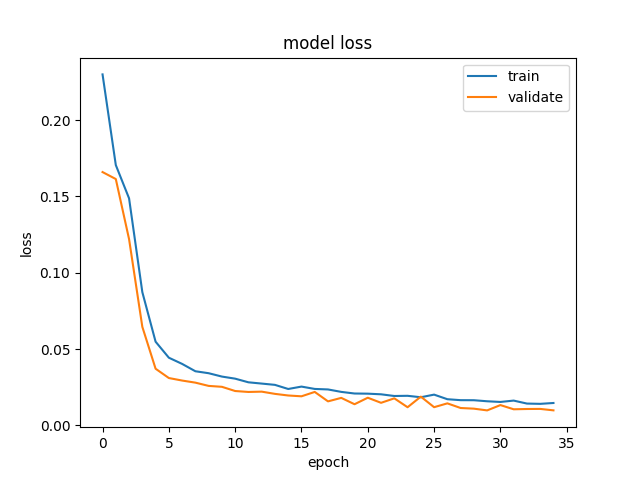

In [12]:
%cd /content/mycar/models

import glob
file = glob.glob("*.png")
  
from IPython.display import Image
Image(file[0])

## Download the trained model

Once the training is complete on colab, download the model file under /content/mycar/models/ folder location.

In [13]:
from google.colab import files

files.download('/content/mycar/models/mypilot.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Alternatively, you can copy the model back to Google Drive too

In [39]:
!cp /content/mycar/models/mypilot.h5 /content/drive/"My Drive"/Colab/models/mypilot.h5

## Create a car on your PC

```bash
cd ~/projects
conda activate donkey
donkey createcar --path ./mycar
```

Edit `myconfig.py`

```
CAMERA_TYPE = "PICAM"
...
DONKEY_GYM = True
DONKEY_SIM_PATH = r"path/to/donkey_sim.exe"
DONKEY_GYM_ENV_NAME = "donkey-generated-track-v0"
```

Copy `mypilot.h5` into `~/projects/mycar/models/`.

```
python manage.py drive --model models/mypilot.h5
```